# tratamiento datos

In [1]:
import os
os.getcwd()

#se definen las carpetas contenedoras de archivos:
folder_path = 'D:\\DOCTORADO\\CLASES\\DEEP LEARNING\\TAREA 1\\split_ids_stamps'
folder_path2 = 'D:\\DOCTORADO\\CLASES\\DEEP LEARNING\\TAREA 1\\'

### archivo csv con ids para train y test

In [2]:
import pandas as pd

#leer archivos entregados test y train:

train_ids = pd.read_csv(folder_path + '\ids_train.txt', header=None)
train_ids =train_ids.rename(columns={0:'ID'})    #cambiar nombre primera columna a ID

test_ids = pd.read_csv(folder_path + '\ids_test.txt', header=None)
test_ids =test_ids.rename(columns={0:'ID'})     #idem

train_ids.shape, test_ids.shape


((6431, 1), (1136, 1))

In [3]:
total = train_ids.shape[0]+test_ids.shape[0]    #verifico total de archivos.
total

7567

### LEER ARCHIVOS DE IMAGENES .FITS Y CREAR DATAFRAME CON LOS IDS

In [3]:
import os
from astropy.io import fits
import numpy as np
import cv2
import pandas as pd

# Leer el archivo CSV con etiquetas:
csv_df = pd.read_csv(folder_path2 + 'CANDELS_trainset_labels.csv', header=0)

# Leer los archivos FITS y crear un dataframe
folder_path = folder_path2 + 'stamps'
fits_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.fits')]
fits_data = []
for i in fits_files:
    with fits.open(i) as hdul:
        data_image = hdul[0].data.astype(np.float32)
        data_resized = cv2.resize(data_image, (31, 31))
        file_name = os.path.splitext(os.path.basename(i))[0]
        fits_data.append({"ID": file_name, "data": data_resized})
fits_df = pd.DataFrame(fits_data)               #creo el dataframe

# Fusionar los dos dataframes utilizando la columna "ID"
merged_df = pd.merge(csv_df, fits_df, on="ID")

# Eliminar el index
merged_df = merged_df.reset_index(drop=True)

# Verificar el resultado
print(merged_df.head())


                ID  p_smooth  p_features  p_irregular  p_point_source  \
0  GDS_deep2_10000  0.400000    0.000000     0.000000             0.6   
1  GDS_deep2_10006  0.000000    1.000000     0.000000             0.0   
2  GDS_deep2_10010  0.400000    0.600000     0.000000             0.0   
3  GDS_deep2_10016  0.166667    0.666667     0.166667             0.0   
4  GDS_deep2_10018  0.428571    0.571429     0.000000             0.0   

   p_unclassifiable                                               data  
0               0.0  [[-0.00319815, -0.004538836, -0.003768052, -0....  
1               0.0  [[-3.0400317e-05, 0.00021060668, -0.0006547379...  
2               0.0  [[0.0013303624, 0.00010306582, -0.0049975277, ...  
3               0.0  [[0.0021695544, 0.0018589196, 0.0027903044, -0...  
4               0.0  [[-0.002534599, -0.0007115202, -0.0007000898, ...  


In [4]:
#cerrar el FITS luego de guardar lo que queremos en una variable, evito exceso de memoria utilizada. 
hdul.close()

### guardar npy

In [8]:
# Guardar los datos totales en un archivo npy como se pidio
np.save("dict_stamps.npy", merged_df)

# cargar npy

In [5]:
#cargar npy
import numpy as np
import pandas as pd

merged_np = np.load(folder_path2 + 'dict_stamps.npy', allow_pickle=True)
merged_df = pd.DataFrame(merged_np)
merged_df.columns = ['ID','p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable', 'data' ]
merged_df

,ID,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable,data
0,GDS_deep2_10000,0.4,0.0,0.0,0.6,0.0,"[[-0.00319815, -0.004538836, -0.003768052, -0...."
1,GDS_deep2_10006,0.0,1.0,0.0,0.0,0.0,"[[-3.0400317e-05, 0.00021060668, -0.0006547379..."
2,GDS_deep2_10010,0.4,0.6,0.0,0.0,0.0,"[[0.0013303624, 0.00010306582, -0.0049975277, ..."
3,GDS_deep2_10016,0.166667,0.666667,0.166667,0.0,0.0,"[[0.0021695544, 0.0018589196, 0.0027903044, -0..."
4,GDS_deep2_10018,0.428571,0.571429,0.0,0.0,0.0,"[[-0.002534599, -0.0007115202, -0.0007000898, ..."
...,...,...,...,...,...,...,...
6426,GDS_wide2_9508,0.0,1.0,0.0,0.0,0.0,"[[0.0027326546, 0.00018857524, -0.0028759942, ..."
6427,GDS_wide2_9529,0.25,0.75,0.0,0.0,0.0,"[[-0.0011271711, 0.0038649093, -0.0004645123, ..."
6428,GDS_wide2_9541,0.0,0.0,0.0,0.0,1.0,"[[0.0039474918, 0.006506627, -0.005499557, -0...."
6429,GDS_wide2_9628,0.4,0.6,0.0,0.0,0.0,"[[0.0028815253, -0.003904383, -0.007798235, -0..."


### ver dos imagenes

In [10]:
data = fits.getdata(folder_path + '\GDS_deep2_3107.fits' )
data2 = fits.getdata(folder_path + '\GDS_deep2_3125.fits' )
data3 = merged_df['data']
data3[345].shape

(31, 31)

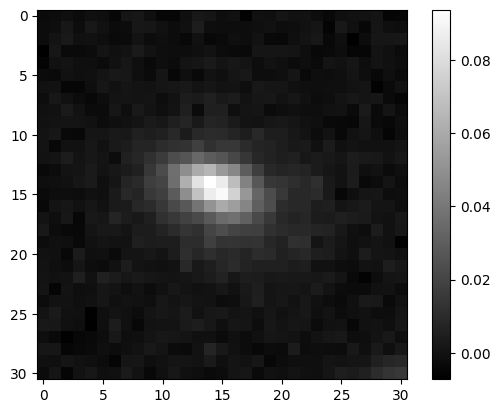

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data3[345], cmap='gray')
plt.colorbar()

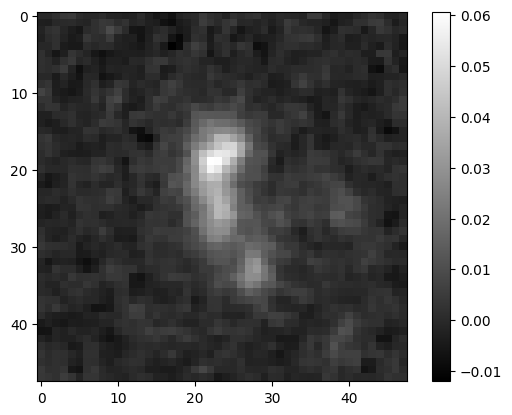

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data, cmap='gray')
plt.colorbar()

In [13]:
import pandas as pd


#etiquetas entregadas para el entrenamiento(en archivo csv), se guardan en la variable train_labels.
train_labels = pd.read_csv(folder_path2 + 'CANDELS_trainset_labels.csv', header=0)
train_labels

,ID,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
0,GDS_deep2_10000,0.400000,0.000000,0.000000,0.600000,0.0
1,GDS_deep2_10006,0.000000,1.000000,0.000000,0.000000,0.0
2,GDS_deep2_10010,0.400000,0.600000,0.000000,0.000000,0.0
3,GDS_deep2_10016,0.166667,0.666667,0.166667,0.000000,0.0
4,GDS_deep2_10018,0.428571,0.571429,0.000000,0.000000,0.0
...,...,...,...,...,...,...
6426,GDS_wide2_9508,0.000000,1.000000,0.000000,0.000000,0.0
6427,GDS_wide2_9529,0.250000,0.750000,0.000000,0.000000,0.0
6428,GDS_wide2_9541,0.000000,0.000000,0.000000,0.000000,1.0
6429,GDS_wide2_9628,0.400000,0.600000,0.000000,0.000000,0.0


# Modelo 1 LeNet: con primera prediccion remitida a profesor.

Epoch 1/50
515/515 [==============================] - 69s 130ms/step - loss: 0.0483 - accuracy: 0.6337 - val_loss: 0.0401 - val_accuracy: 0.6605
Epoch 2/50
515/515 [==============================] - 67s 130ms/step - loss: 0.0375 - accuracy: 0.7061 - val_loss: 0.0344 - val_accuracy: 0.7249
Epoch 3/50
515/515 [==============================] - 59s 115ms/step - loss: 0.0338 - accuracy: 0.7257 - val_loss: 0.0346 - val_accuracy: 0.6985
Epoch 4/50
515/515 [==============================] - 80s 156ms/step - loss: 0.0327 - accuracy: 0.7278 - val_loss: 0.0344 - val_accuracy: 0.6962
Epoch 5/50
515/515 [==============================] - 82s 159ms/step - loss: 0.0322 - accuracy: 0.7294 - val_loss: 0.0334 - val_accuracy: 0.7024
Epoch 6/50
515/515 [==============================] - 71s 138ms/step - loss: 0.0316 - accuracy: 0.7323 - val_loss: 0.0331 - val_accuracy: 0.7040
Epoch 7/50
515/515 [==============================] - 68s 132ms/step - loss: 0.0314 - accuracy: 0.7358 - val_loss: 0.0320 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

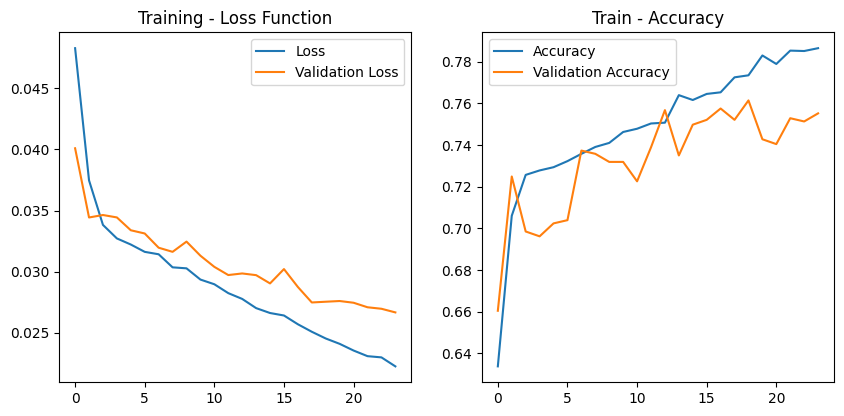

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping


# Crear modelo
model = keras.Sequential()

# Añadir capas
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(31, 31, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#fully connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)   
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(x_data_train, y_data_train, epochs=50, batch_size= 10, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)  #validation_data=(x_val, y_val)


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

### 1ra prediccion enviada:

In [11]:
#Get the predictions for the test data
predicted_classes = model.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes

36/36 [==============================] - 4s 64ms/step


array([[0.25902462, 0.1709196 , 0.07373156, 0.3478686 , 0.14845575],
       [0.1885849 , 0.6770243 , 0.11918577, 0.0087895 , 0.00641553],
       [0.35443288, 0.2564422 , 0.08727849, 0.2504024 , 0.0514441 ],
       ...,
       [0.01369527, 0.8092681 , 0.15885831, 0.00134821, 0.01683008],
       [0.47581738, 0.39659187, 0.03755912, 0.08826072, 0.00177092],
       [0.13945048, 0.70605093, 0.14875689, 0.00398775, 0.00175391]],
      dtype=float32)

In [29]:
predicted_classes = pd.DataFrame(predicted_classes)
predicted_classes.columns = ['p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable' ]

predicted_classes

,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
0,0.259025,0.170920,0.073732,0.347869,0.148456
1,0.188585,0.677024,0.119186,0.008789,0.006416
2,0.354433,0.256442,0.087278,0.250402,0.051444
3,0.048764,0.565167,0.295218,0.014019,0.076832
4,0.035185,0.372283,0.557314,0.005995,0.029223
...,...,...,...,...,...
1131,0.065910,0.396068,0.252644,0.039338,0.246039
1132,0.446536,0.437340,0.040489,0.070546,0.005089
1133,0.013695,0.809268,0.158858,0.001348,0.016830
1134,0.475817,0.396592,0.037559,0.088261,0.001771


In [39]:
x_test = fits_df[~fits_df['ID'].isin(csv_df['ID'])]     #separo los datos que no fueron considerados en el archivo de entrenamie
x_test

,ID,data
17,GDS_deep2_10075,"[[0.05747773, 0.07874704, 0.095994875, 0.10654..."
19,GDS_deep2_10082,"[[0.002176411, 0.0020879677, 0.0016888835, 0.0..."
23,GDS_deep2_10087,"[[0.011481131, 0.007765038, 0.01035171, 0.0082..."
31,GDS_deep2_10110,"[[0.0005720686, -0.0026189694, -0.0035347536, ..."
37,GDS_deep2_10135,"[[0.0011566619, 0.003072136, -0.0013329198, -0..."
...,...,...
7548,GDS_wide2_9762,"[[0.0036887755, 0.012316644, 0.00027019836, 0...."
7557,GDS_wide2_9865,"[[-0.0030256575, 0.00060311623, 0.0067251567, ..."
7559,GDS_wide2_9894,"[[0.0009789221, -0.00140995, -0.004255987, -0...."
7560,GDS_wide2_991,"[[-0.00077225897, -0.0014723171, -0.0011853767..."


In [41]:
predicted_classes['ID'] = x_test['ID'].values
predicted_classes.set_index('ID', inplace=True)

predicted_classes

,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
ID,,,,,
GDS_deep2_10075,0.259025,0.170920,0.073732,0.347869,0.148456
GDS_deep2_10082,0.188585,0.677024,0.119186,0.008789,0.006416
GDS_deep2_10087,0.354433,0.256442,0.087278,0.250402,0.051444
GDS_deep2_10110,0.048764,0.565167,0.295218,0.014019,0.076832
GDS_deep2_10135,0.035185,0.372283,0.557314,0.005995,0.029223
...,...,...,...,...,...
GDS_wide2_9762,0.065910,0.396068,0.252644,0.039338,0.246039
GDS_wide2_9865,0.446536,0.437340,0.040489,0.070546,0.005089
GDS_wide2_9894,0.013695,0.809268,0.158858,0.001348,0.016830


In [45]:
predicted_classes.to_csv('predicted.csv', index=True)

### de acuerdo a lo expresado por profesor, RMSE fue de 0.1645